In [2]:
# Nadil

Pre processing the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Kickstarter.csv', encoding='latin-1')

In [5]:
# drop the last column
df = df.drop(df.columns[len(df.columns)-1], axis=1)

In [6]:
# drop the rows which has no name
df = df.dropna(subset=df.columns[[1]])

In [7]:
# replace column names with colNames

colNames = ['Name', 'Category', 'Deadline', 'Goal', 'Pledged', 'Status', 'Backers']
df.columns = colNames

Cleaning the Deadline column

In [8]:
# function to check whether a given string is an integer or not

def isInt(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

In [9]:
# function to clean the deadline column and extract the year only
# date format is not unique throughout the column
# use isInt function to check whether a given string is an integer or not

def cleanDeadline(deadline):
    for i in range(len(deadline)):
        if deadline[i] == '2' and deadline[i+1] == '0' and isInt(deadline[i:i+4]):
            return deadline[i:i+4]

In [10]:
# convert the deadline column to string
df['Deadline'] = df['Deadline'].astype(str)

# apply the function to the column deadline using lambda function
df['Deadline'] = df['Deadline'].apply(lambda x: cleanDeadline(x))

In [11]:
# drop the rows where the value of the column Year is None

df = df.dropna(subset=['Deadline'])

Check Category Column

In [12]:
df['Category'].unique()

array(['Hardware', 'Gadgets', 'Web', 'Apps', 'Technology', 'Software',
       'Flight', 'Makerspaces', 'Fabrication Tools', 'Sound',
       'DIY Electronics', 'Camera Equipment', '3D Printing', 'Wearables',
       'Space Exploration', 'Robots'], dtype=object)

In [13]:
# group the dataframe by category and get number of entries in each category

df.groupby('Category').size()


Category
3D Printing           338
Apps                 2986
Camera Equipment      187
DIY Electronics       419
Fabrication Tools     127
Flight                212
Gadgets              1362
Hardware             1905
Makerspaces           129
Robots                265
Software             1558
Sound                 302
Space Exploration     160
Technology           3560
Wearables             536
Web                  1949
dtype: int64

Dataframe

In [14]:
df

,Name,Category,Deadline,Goal,Pledged,Status,Backers
0,Safer Home,Hardware,2015,50000,0,failed,0
1,Gizbee Unlimited Removable Storage for Your T...,Gadgets,2016,87000,2030,canceled,15
2,Diposta - liberating people from their postal ...,Web,2016,100000,141,failed,3
3,Best Spray Bottle Ever - SureShot,Gadgets,2015,25000,3,failed,3
4,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,2015,50000,11336,canceled,19
...,...,...,...,...,...,...,...
15995,Safeskoolz: Safety & Emergency Communication F...,Apps,2014,367000,447,failed,19
15996,The Beer Machine that keeps track of who's dri...,Hardware,2016,107500,11564,live,33
15997,CopCritic App: Helping Police & Public Communi...,Apps,2016,30000,101,failed,2
15998,Geeftz for Christmas (Canceled),Apps,2015,3000,1222,canceled,26


Success Rate of Projects for each Category over the Years.

In [15]:
Categories = df['Category'].unique()
print(Categories)
print(len(Categories))

['Hardware' 'Gadgets' 'Web' 'Apps' 'Technology' 'Software' 'Flight'
 'Makerspaces' 'Fabrication Tools' 'Sound' 'DIY Electronics'
 'Camera Equipment' '3D Printing' 'Wearables' 'Space Exploration' 'Robots']
16


In [16]:
Years = df['Deadline'].unique()
print(Years)
print(len(Years))

['2015' '2016' '2012' '2011' '2014' '2013' '2017' '2010' '2009']
9


In [17]:
dftemp = df.groupby(['Category', 'Deadline', 'Status']).size().reset_index(name='Count')
dftemp

,Category,Deadline,Status,Count
0,3D Printing,2013,canceled,2
1,3D Printing,2013,failed,2
2,3D Printing,2013,successful,12
3,3D Printing,2014,canceled,18
4,3D Printing,2014,failed,38
...,...,...,...,...
298,Web,2016,live,23
299,Web,2016,successful,29
300,Web,2016,suspended,6
301,Web,2017,canceled,1


In [18]:
# plot a pivot table making each status a column fill missing values with 0

dfpivot = dftemp.pivot_table(index=['Category', 'Deadline'], columns='Status', values='Count', fill_value=0)

# Reset the index to convert the index into a regular column
dfpivot = dfpivot.reset_index()
dfpivot.columns.name = None

dfpivot

,Category,Deadline,canceled,failed,live,successful,suspended,undefined
0,3D Printing,2013,2,2,0,12,0,0
1,3D Printing,2014,18,38,0,30,0,0
2,3D Printing,2015,21,79,0,47,5,1
3,3D Printing,2016,10,42,4,24,1,0
4,3D Printing,2017,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...
104,Web,2013,0,0,0,3,0,0
105,Web,2014,76,376,0,41,2,0
106,Web,2015,148,741,0,58,6,0
107,Web,2016,74,350,23,29,6,0


In [19]:
dfpivot['Success Rate'] = (dfpivot['successful'] + dfpivot['live']) / (dfpivot['canceled'] + dfpivot['failed'] + dfpivot['live'] + dfpivot['successful'] + dfpivot['suspended'] + dfpivot['undefined'])
dfpivot.drop(['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'], axis=1, inplace=True)
dfpivot

,Category,Deadline,Success Rate
0,3D Printing,2013,0.750000
1,3D Printing,2014,0.348837
2,3D Printing,2015,0.307190
3,3D Printing,2016,0.345679
4,3D Printing,2017,1.000000
...,...,...,...
104,Web,2013,1.000000
105,Web,2014,0.082828
106,Web,2015,0.060860
107,Web,2016,0.107884


In [20]:
# convert dfpivot to data frame where there is one row for each year and one column for each category and the values are the success rates
# fill missing values with 0

dfpivot2 = dfpivot.pivot(index='Deadline', columns='Category', values='Success Rate').fillna(0)
dfpivot2 = dfpivot2.reset_index()
dfpivot2.columns.name = None
dfpivot2

,Deadline,3D Printing,Apps,Camera Equipment,DIY Electronics,Fabrication Tools,Flight,Gadgets,Hardware,Makerspaces,Robots,Software,Sound,Space Exploration,Technology,Wearables,Web
0,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.333333,0.000000,0.000000,0.250000,0.000000,0.000000
1,2010,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.344828,0.000000,0.000000,0.223684,0.000000,1.000000,0.500000,0.000000,0.000000
2,2011,0.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.396825,1.000000,1.000000,0.157143,0.000000,1.000000,0.248000,0.000000,0.000000
3,2012,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.415094,1.000000,1.000000,0.238095,1.000000,1.000000,0.338912,0.000000,0.000000
4,2013,0.750000,1.000000,0.857143,1.000000,0.666667,1.000000,1.000000,0.397500,1.000000,1.000000,0.202614,1.000000,1.000000,0.262651,0.000000,1.000000
5,2014,0.348837,0.054226,0.560976,0.455446,0.153846,0.156863,0.251969,0.291417,0.391304,0.381818,0.117816,0.311475,0.259259,0.185276,0.362832,0.082828
6,2015,0.307190,0.058462,0.415584,0.473054,0.234043,0.157895,0.247961,0.280778,0.315789,0.350877,0.085470,0.339450,0.261538,0.151372,0.313636,0.060860
7,2016,0.345679,0.107212,0.473684,0.507937,0.276596,0.203390,0.329060,0.358896,0.333333,0.388060,0.166667,0.483051,0.304348,0.216882,0.388601,0.107884
8,2017,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.937500,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.906250,1.000000,0.937500


In [21]:
# multiply the whole dataframe except the first column by 100 to get the success rates in percentage

dfpivot2[dfpivot2.columns[1:]] = dfpivot2[dfpivot2.columns[1:]] * 100
dfpivot2

,Deadline,3D Printing,Apps,Camera Equipment,DIY Electronics,Fabrication Tools,Flight,Gadgets,Hardware,Makerspaces,Robots,Software,Sound,Space Exploration,Technology,Wearables,Web
0,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,33.333333,0.000000,0.000000,25.000000,0.000000,0.000000
1,2010,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,34.482759,0.000000,0.000000,22.368421,0.000000,100.000000,50.000000,0.000000,0.000000
2,2011,0.000000,100.000000,100.000000,100.000000,50.000000,0.000000,0.000000,39.682540,100.000000,100.000000,15.714286,0.000000,100.000000,24.800000,0.000000,0.000000
3,2012,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,41.509434,100.000000,100.000000,23.809524,100.000000,100.000000,33.891213,0.000000,0.000000
4,2013,75.000000,100.000000,85.714286,100.000000,66.666667,100.000000,100.000000,39.750000,100.000000,100.000000,20.261438,100.000000,100.000000,26.265060,0.000000,100.000000
5,2014,34.883721,5.422648,56.097561,45.544554,15.384615,15.686275,25.196850,29.141717,39.130435,38.181818,11.781609,31.147541,25.925926,18.527607,36.283186,8.282828
6,2015,30.718954,5.846154,41.558442,47.305389,23.404255,15.789474,24.796085,28.077754,31.578947,35.087719,8.547009,33.944954,26.153846,15.137181,31.363636,6.086044
7,2016,34.567901,10.721248,47.368421,50.793651,27.659574,20.338983,32.905983,35.889571,33.333333,38.805970,16.666667,48.305085,30.434783,21.688159,38.860104,10.788382
8,2017,100.000000,100.000000,100.000000,0.000000,0.000000,100.000000,93.750000,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,90.625000,100.000000,93.750000


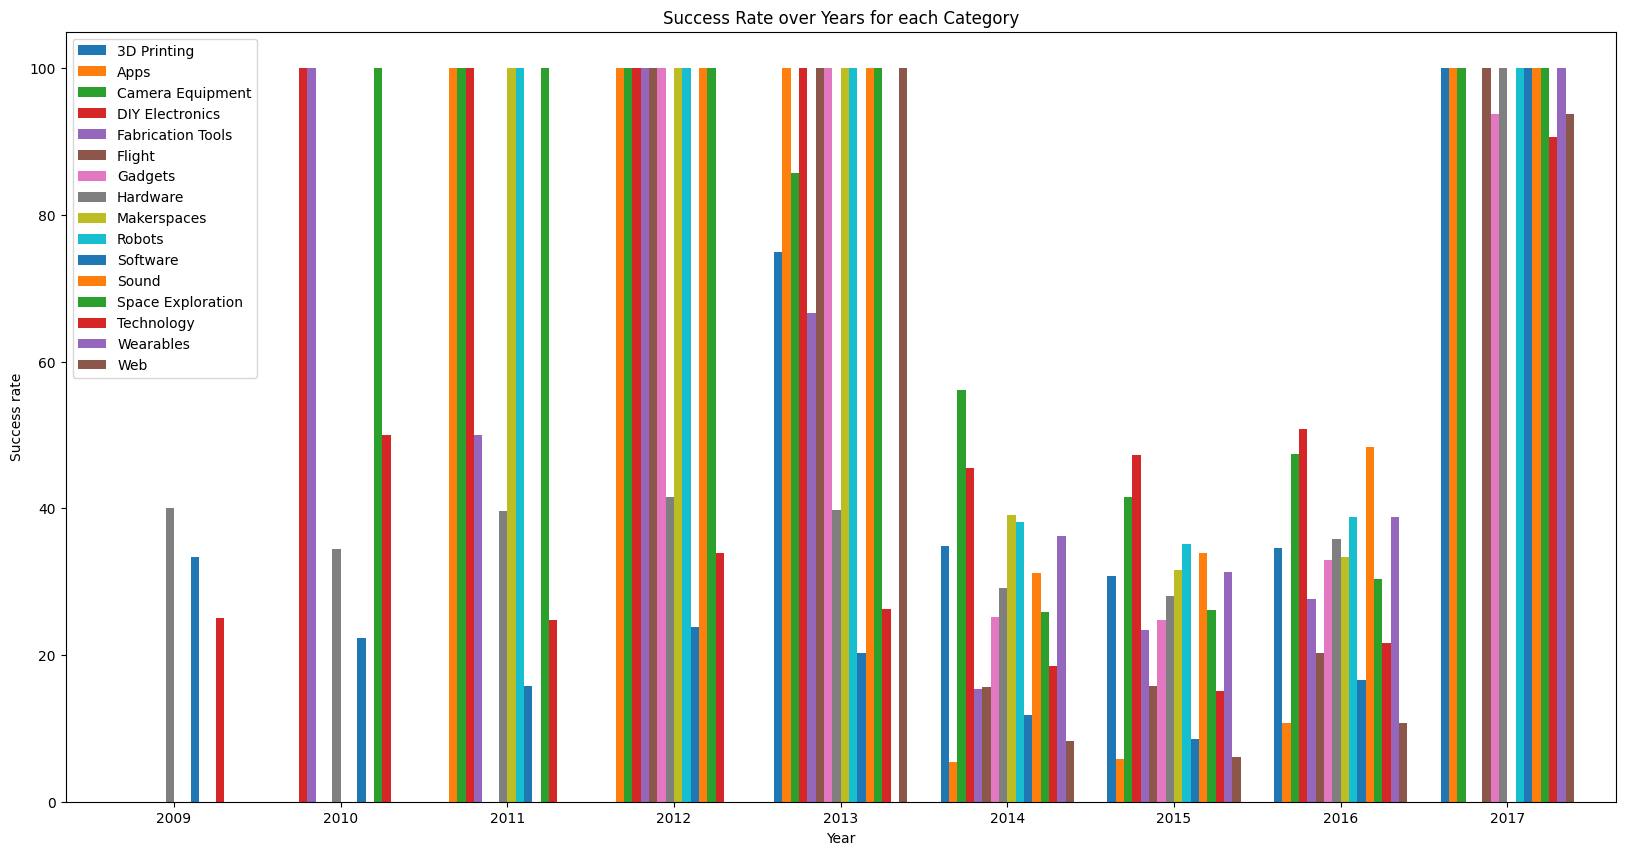

In [22]:
ax = dfpivot2.plot(kind='bar', width=2.0 - 1.2, figsize=(20,10))
ax.set_xlabel('Year')
ax.set_ylabel('Success rate')
ax.set_title('Success Rate over Years for each Category')

plt.xticks(dfpivot2.index, dfpivot2['Deadline'], rotation=0)

# Set y-axis limits from 0 to 100
plt.ylim(0, 105) 

# Show the plot
plt.show()

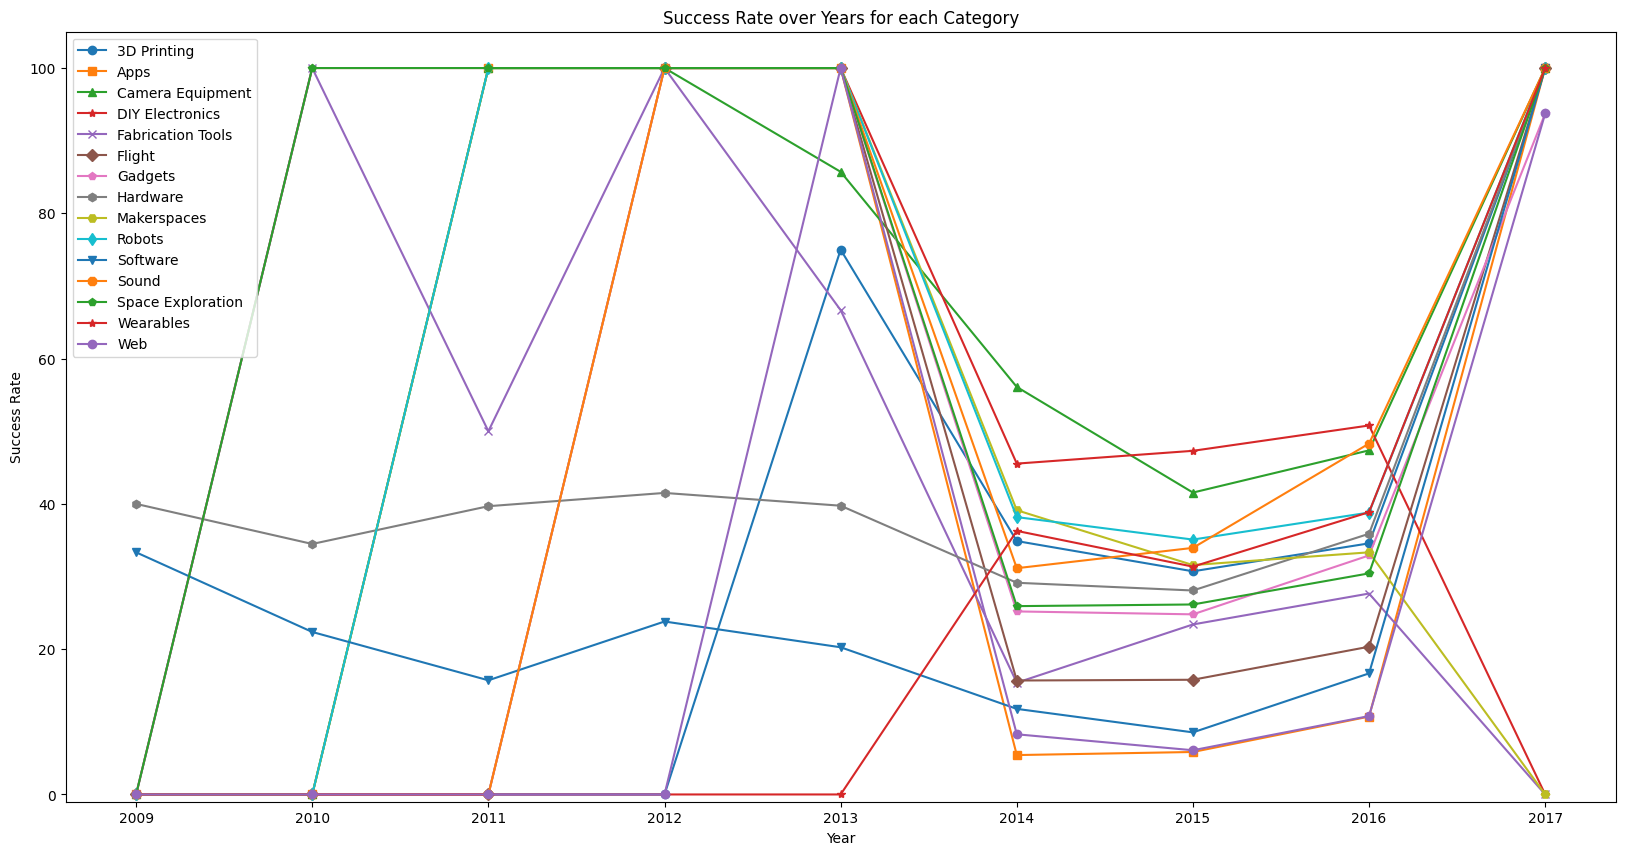

In [23]:
plt.figure(figsize=(20,10))

plt.plot(dfpivot2['Deadline'], dfpivot2['3D Printing'], marker='o', label='3D Printing')
plt.plot(dfpivot2['Deadline'], dfpivot2['Apps'], marker='s', label='Apps')
plt.plot(dfpivot2['Deadline'], dfpivot2['Camera Equipment'], marker='^', label='Camera Equipment')
plt.plot(dfpivot2['Deadline'], dfpivot2['DIY Electronics'], marker='*', label='DIY Electronics')
plt.plot(dfpivot2['Deadline'], dfpivot2['Fabrication Tools'], marker='x', label='Fabrication Tools')
plt.plot(dfpivot2['Deadline'], dfpivot2['Flight'], marker='D', label='Flight')
plt.plot(dfpivot2['Deadline'], dfpivot2['Gadgets'], marker='p', label='Gadgets')
plt.plot(dfpivot2['Deadline'], dfpivot2['Hardware'], marker='h', label='Hardware')
plt.plot(dfpivot2['Deadline'], dfpivot2['Makerspaces'], marker='H', label='Makerspaces')
plt.plot(dfpivot2['Deadline'], dfpivot2['Robots'], marker='d', label='Robots')
plt.plot(dfpivot2['Deadline'], dfpivot2['Software'], marker='v', label='Software')
plt.plot(dfpivot2['Deadline'], dfpivot2['Sound'], marker='8', label='Sound')
plt.plot(dfpivot2['Deadline'], dfpivot2['Space Exploration'], marker='p', label='Space Exploration')
plt.plot(dfpivot2['Deadline'], dfpivot2['Wearables'], marker='*', label='Wearables')
plt.plot(dfpivot2['Deadline'], dfpivot2['Web'], marker='o', label='Web')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate over Years for each Category')

plt.ylim(-1, 105) 

# Add a legend
plt.legend()

# Show the plot
plt.show()

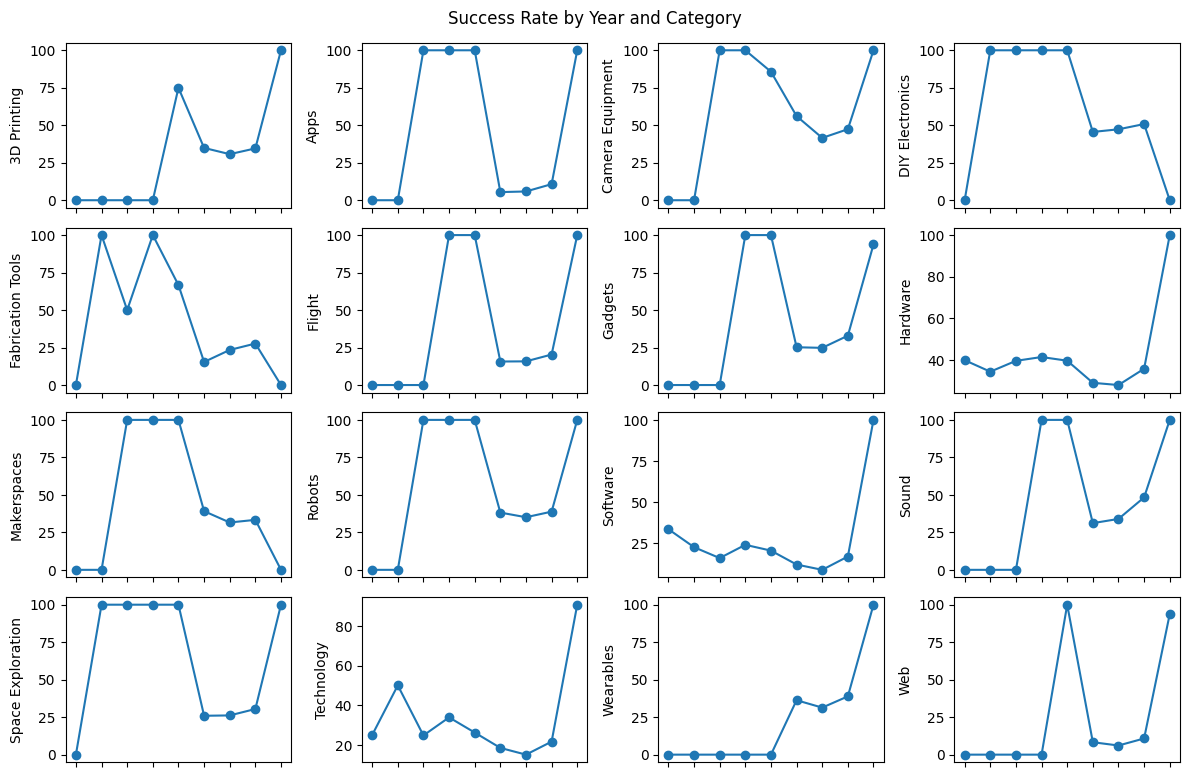

In [79]:

# Get the list of categories
categories = dfpivot2.columns[1:]

# Determine the number of rows and columns for the grid
num_rows = len(categories)
num_cols = 4  # Set the desired number of columns

# Set up the subplots with grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 30), sharex=True)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over categories and plot on respective subplots
for i, category in enumerate(categories):
    ax = axes[i]
    ax.plot(dfpivot2['Deadline'], dfpivot2[category], marker='o')
    ax.set_ylabel(category)

# Remove empty subplots if the number of categories is not a perfect fit for the grid
if num_rows * num_cols > len(categories):
    for j in range(len(categories), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.xticks(dfpivot2['Deadline'])

# Set common x-axis label and title
axes[-1].set_xlabel('Year')
fig.suptitle('Success Rate by Year and Category', y=0.995)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()